# Calibrate a Camera
from https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

get checker points

In [9]:
# %reset
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt

# Specify grid layout on checkerboard
row = 7
col = 10

# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((row*col,3), np.float32)
objp[:,:2] = np.mgrid[0:col,0:row].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('external_webcam\\*.png') # Adjust file path as needed
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (col,row), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (col,row), corners2, ret)
        cv.imshow('img', img)
        cv.waitKey(500)
cv.destroyAllWindows()

calibrate camera

In [10]:
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

save as json

In [ ]:
# Save a unique file name unique to the camera
np.savez('external_webcam_calibration.npz', mtx=mtx, dist=dist)

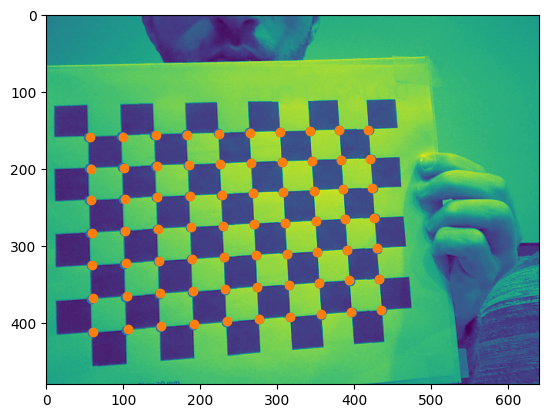

In [12]:
# https://docs.opencv.org/4.x/d9/d0c/group__calib3d.html#ga55c716492470bfe86b0ee9bf3a1f0f7e
# How to undistort image points
img = cv.imread('external_webcam\\img_3.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, corners = cv.findChessboardCorners(gray, (col,row), None)
# If found, add object points, image points (after refining them)
if ret == True:
    objpoints.append(objp)
    corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
    imgpoints.append(corners2)

# For reference on how to display points on calibration image
plt.imshow(gray)
img = np.squeeze(imgpoints)
plt.scatter(x=img[-1][:,0], y=img[-1][:,1])
pts1 = np.array(np.squeeze(imgpoints[-1]))
pts = np.squeeze(cv.undistortPoints(pts1, mtx, dist))
plt.scatter(x=pts[:,0]*mtx[0,0]+mtx[0,2], y=pts[:,1]*mtx[1,1]+mtx[1,2])
plt.show()